<a href="https://colab.research.google.com/github/Sourav-Manik/AI-Assignments/blob/main/Assignment_5_Decision_Tree_(Company_Data).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Libraries/ Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import seaborn as sns

In [ ]:
# import some data to play with
company_df = pd.read_csv('/content/Company_Data.csv')

In [ ]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


#Data Understanding

In [ ]:
company_df.shape

(400, 11)

In [ ]:
company_df.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

In [ ]:
company_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
company_df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [ ]:
company_df.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


As the business is interested to know about the segment or attributes causes high sale. We'll classify above 75 percentile sales value as good sales else classify it as normal sales.

High sales value = 1
Avg sales vaule = 0

In [ ]:
company_df['High_sales'] = np.where(company_df['Sales'] >= 9.32, 1, 0)

In [ ]:
company_df

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,High_sales
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,1
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,1
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,1
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,0
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,1
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,0
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,0
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,0


In [ ]:
company_df['High_sales'].value_counts()

0    298
1    102
Name: High_sales, dtype: int64

In [ ]:
company_df=pd.get_dummies(company_df)

In [ ]:
company_df.head()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education,High_sales,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,9.50,138,73,11,276,120,42,17,1,1,0,0,0,1,0,1
1,11.22,111,48,16,260,83,65,10,1,0,1,0,0,1,0,1
2,10.06,113,35,10,269,80,59,12,1,0,0,1,0,1,0,1
3,7.40,117,100,4,466,97,55,14,0,0,0,1,0,1,0,1
4,4.15,141,64,3,340,128,38,13,0,1,0,0,0,1,1,0


In [ ]:
X = company_df.drop(labels = ['Sales','High_sales'],axis = 1)
y = company_df[['High_sales']]
X.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [ ]:
company_df.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education', 'High_sales', 'ShelveLoc_Bad', 'ShelveLoc_Good',
       'ShelveLoc_Medium', 'Urban_No', 'Urban_Yes', 'US_No', 'US_Yes'],
      dtype='object')

In [ ]:
y.head()

,High_sales
0,1
1,1
2,1
3,0
4,0


In [ ]:
X.shape, y.shape

((400, 14), (400, 1))

#EDA

<function matplotlib.pyplot.show(*args, **kw)>

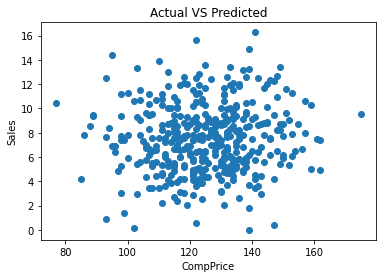

In [ ]:
plt.scatter(company_df.CompPrice,company_df.Sales)
plt.xlabel('CompPrice')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

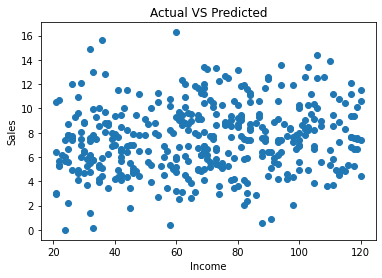

In [ ]:
plt.scatter(company_df.Income,company_df.Sales)
plt.xlabel('Income')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

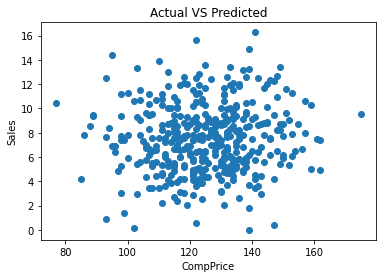

In [ ]:
plt.scatter(company_df.CompPrice,company_df.Sales)
plt.xlabel('CompPrice')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

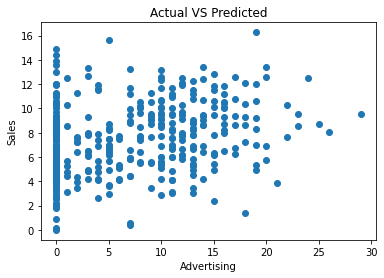

In [ ]:
plt.scatter(company_df.Advertising,company_df.Sales)
plt.xlabel('Advertising')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

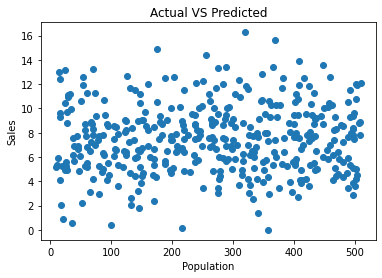

In [ ]:
plt.scatter(company_df.Population,company_df.Sales)
plt.xlabel('Population')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

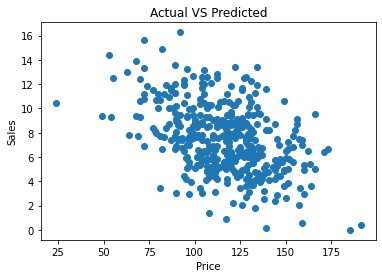

In [ ]:
plt.scatter(company_df.Price,company_df.Sales)
plt.xlabel('Price')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

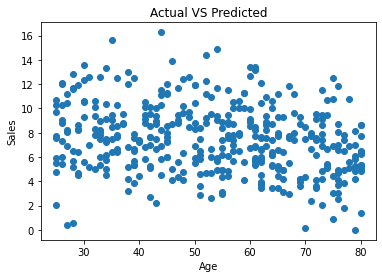

In [ ]:
plt.scatter(company_df.Age,company_df.Sales)
plt.xlabel('Age')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

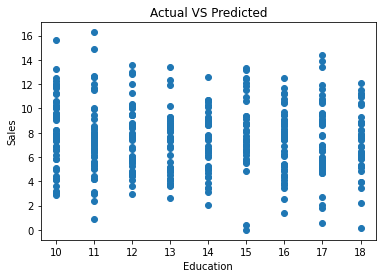

In [ ]:
plt.scatter(company_df.Education,company_df.Sales)
plt.xlabel('Education')
plt.ylabel('Sales')
plt.title('Actual VS Predicted')
plt.show

#Model Transformation

In [ ]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
min_max_scaler = min_max_scaler.fit_transform(X) #intelligence is stored in this variable
X_scaled = pd.DataFrame(data = min_max_scaler,columns =X.columns )

In [ ]:
X_scaled.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,0.622449,0.525253,0.379310,0.533066,0.574850,0.309091,0.875,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.346939,0.272727,0.551724,0.501002,0.353293,0.727273,0.000,0.0,1.0,0.0,0.0,1.0,0.0,1.0
2,0.367347,0.141414,0.344828,0.519038,0.335329,0.618182,0.250,0.0,0.0,1.0,0.0,1.0,0.0,1.0
3,0.408163,0.797980,0.137931,0.913828,0.437126,0.545455,0.500,0.0,0.0,1.0,0.0,1.0,0.0,1.0
4,0.653061,0.434343,0.103448,0.661323,0.622754,0.236364,0.375,1.0,0.0,0.0,0.0,1.0,1.0,0.0


In [ ]:
X_scaled.mean()

CompPrice           0.489541
Income              0.481389
Advertising         0.228793
Population          0.510701
Price               0.549671
Age                 0.514955
Education           0.487500
ShelveLoc_Bad       0.240000
ShelveLoc_Good      0.212500
ShelveLoc_Medium    0.547500
Urban_No            0.295000
Urban_Yes           0.705000
US_No               0.355000
US_Yes              0.645000
dtype: float64

In [ ]:
X_scaled.std()

CompPrice           0.156475
Income              0.282687
Advertising         0.229323
Population          0.295344
Price               0.141776
Age                 0.294551
Education           0.327566
ShelveLoc_Bad       0.427618
ShelveLoc_Good      0.409589
ShelveLoc_Medium    0.498362
Urban_No            0.456614
Urban_Yes           0.456614
US_No               0.479113
US_Yes              0.479113
dtype: float64

#Model Building

In [ ]:
y.value_counts()  #1 is for high_sales and 0 is for Average_sales

High_sales
0             298
1             102
dtype: int64

In [ ]:
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

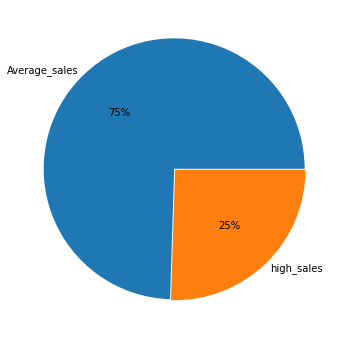

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(x=y.value_counts(),explode= [0.01,0],labels = ['Average_sales','high_sales'], autopct='%1.0f%%', labeldistance = 1.05)
plt.show

Note - As we have more number of dataset for Average_sales the model will show less error for Average_sales records than high_sales data. Thus the dataset is imbalance.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size = 0.20,random_state= 12,shuffle= True, stratify = y)

In the "train_test_split" function, the "stratify" argument is used upon the test data. The sole purpose of the argument is to ensure that the same proportion of examples is preserved across each class of training and testing data.

In our case the ratio between high and average sales is 25:75. So our train and test data should also show the same proportion. For this we have to mark  stratify = y in train_test_split.

In [ ]:
X_train.shape, y_train.shape

((320, 14), (320, 1))

<function matplotlib.pyplot.show(*args, **kw)>

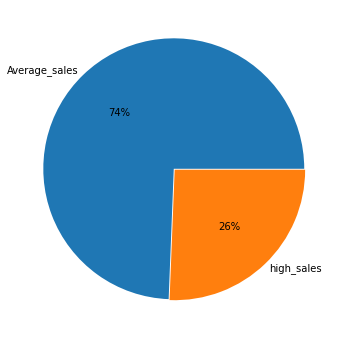

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(x=y_train.value_counts(),explode= [0.01,0],labels = ['Average_sales','high_sales'], autopct='%1.0f%%', labeldistance = 1.05)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

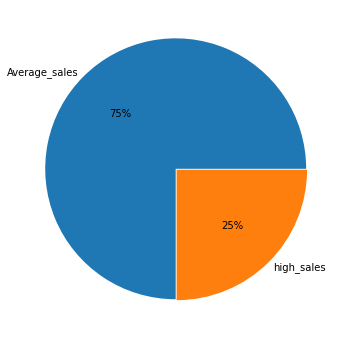

In [ ]:
plt.figure(figsize = (6,6))
plt.pie(x=y_test.value_counts(),explode= [0.01,0],labels = ['Average_sales','high_sales'], autopct='%1.0f%%', labeldistance = 1.05)
plt.show

#Hyper-Parameter Optimization

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(estimator = model,
                            param_grid = {'criterion': ['gini','entropy'],
                                          'max_depth': [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21],
                                          },
                            cv = 5)

In [ ]:
grid_search.fit(X,y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21]})

In [ ]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 15}

#Model Training

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 14,class_weight = {0:1,1:3})
#in hyperparameter 'class_weight" we are giving thrice as much weight to high sales compared to Average sales as the data is imbalance.
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight={0: 1, 1: 3}, max_depth=14)

#Model Testing | Model Evaluation

Training Data

In [ ]:
y_pred_train = dt_model.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report:\n', classification_report(y_train,y_pred_train))
print('======================================================================')
print('Confusion Matrix:\n',confusion_matrix(y_train,y_pred_train))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       238
           1       1.00      1.00      1.00        82

    accuracy                           1.00       320
   macro avg       1.00      1.00      1.00       320
weighted avg       1.00      1.00      1.00       320

Confusion Matrix:
 [[238   0]
 [  0  82]]


In [ ]:
train_accuracy = dt_model.score(X_train,y_train)
train_accuracy

1.0

Test Data

In [ ]:
y_pred_test = dt_model.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print('Classification report:\n', classification_report(y_test,y_pred_test))
print('======================================================================')
print('Confusion Matrix:\n',confusion_matrix(y_test,y_pred_test))

Classification report:
               precision    recall  f1-score   support

           0       0.92      0.90      0.91        60
           1       0.71      0.75      0.73        20

    accuracy                           0.86        80
   macro avg       0.81      0.82      0.82        80
weighted avg       0.87      0.86      0.86        80

Confusion Matrix:
 [[54  6]
 [ 5 15]]


In [ ]:
#Find the accuracy
test_accuracy = dt_model.score(X_test,y_test)
test_accuracy

0.8625

<Figure size 1728x1152 with 0 Axes>

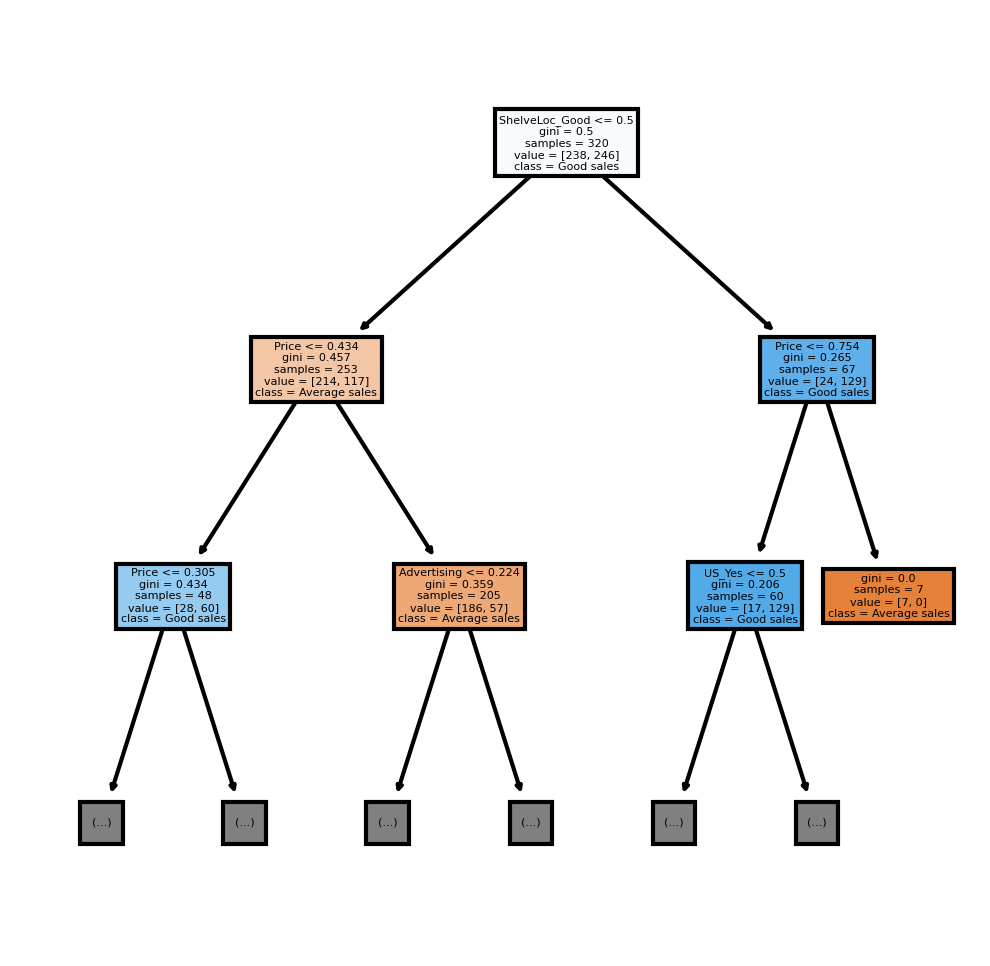

In [ ]:
plt.figure(figsize = (24,16))

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(dt_model,
               max_depth = 2,
               feature_names = X.columns, 
               class_names=['Average sales','Good sales'],
               filled = True);
plt.show()

#Using Ensembel method to resolve overfitting problem

##Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(bootstrap=True, class_weight = {0:1,1:3},criterion='gini',n_estimators=15,random_state = 1)

In [ ]:
model_rf.fit(X_train,y_train)

<ipython-input-142-886240159eb4>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rf.fit(X_train,y_train)


RandomForestClassifier(class_weight={0: 1, 1: 3}, n_estimators=15,
                       random_state=1)

In [ ]:
model_rf.score(X_train,y_train)

1.0

In [ ]:
model_rf.score(X_test,y_test)

0.9

In [ ]:
#End